## PROBLEM 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least 
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

Step 1. Import the necessary libraries

In [82]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2. Import the dataset from this address.

In [83]:
df = pd.read_csv('Occupations.csv')

Step 3. Assign it to a variable called users

In [84]:
df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4. Discover what is the mean age per occupation

In [85]:
df.groupby('occupation').mean(['age'])

,user_id,age
occupation,,
administrator,430.949367,38.746835
artist,451.892857,31.392857
doctor,533.714286,43.571429
educator,466.905263,42.010526
engineer,456.328358,36.388060
entertainment,398.000000,29.222222
executive,422.312500,38.718750
healthcare,501.437500,41.562500
homemaker,443.000000,32.571429


In [86]:
setb = df[['occupation','gender']]

In [87]:
total_dict = setb['occupation'].value_counts().to_dict()

In [88]:
male_dict = setb[setb['gender'] == 'M']['occupation'].value_counts().to_dict()

In [89]:
male_ratio_dict ={}
for key in total_dict:
    ratio = male_dict[key] / total_dict[key]
    male_ratio_dict[key] = ratio

In [90]:
x = male_ratio_dict
male_ratio = {k: v for k, v in sorted(x.items(),reverse=True, key=lambda item: item[1])}
female_ratio = {k:100*(1-v) for k, v in male_ratio.items()}

In [91]:
# min max
df.groupby('occupation').agg({'age': ['min', 'max']})

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [92]:
df.groupby(['occupation','gender']).agg({'age': ['mean']})

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

# Problem 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [93]:
import pandas as pd
import numpy as np

In [94]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [95]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [96]:
# no of teams prticipated
euro12.Team.nunique()

16

In [97]:
# no of columns
euro12.shape[1]

35

In [98]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]

In [99]:
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [100]:
discipline.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [101]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [102]:
# teams that scored more than 6 goals
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [103]:
# teams that start with G
euro12[euro12.Team.str.startswith('G')]['Team']

5    Germany
6     Greece
Name: Team, dtype: object

In [104]:
# first 7 columns
euro12.iloc[: , :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [105]:
# all columns except last 3
euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [106]:
# shooting accuracy of England, Italy, Russia
euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Problem 3

Housing
Step 1.Import the necessary libraries
 Step 2.Create 3 differents Series, each of length 100, as follows:
The first a random number from 1 to 4
The second a random number from 1 to 3
The third a random number from 10,000 to 30,000
Step 3.Create a DataFrame by joinning the Series by column
Step 4.Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5.Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true? Step 7. Reindex the DataFrame so it goes from 0 to 299

In [107]:
import random

# 
randomlist_1 = []
for i in range(0,100):
    n = random.randint(1,4)
    randomlist_1.append(n)

#
randomlist_2 = []
for i in range(0,100):
    n = random.randint(1,3)
    randomlist_2.append(n)
#
randomlist_3 = []
for i in range(0,100):
    n = random.randint(10000,30000)
    randomlist_3.append(n)
#
c1 = pd.Series(randomlist_1)
c2 = pd.Series(randomlist_2)
c3 = pd.Series(randomlist_3)
#
dict1 = {"bedrs":c1,"bathrs":c2,"price_sqr_meter":c3}
df1 = pd.DataFrame(dict1)
f = pd.concat([df1['bedrs'], df1['bathrs'], df1['price_sqr_meter']]) 
df2 = pd.DataFrame({"bigcolumn":f})
df2.reset_index(drop=True)

,bigcolumn
0,1
1,3
2,1
3,3
4,2
...,...
295,29035
296,27056
297,10583
298,22229


In [108]:
import random
randomlist_1 = []
for i in range(0,100):
    n = random.randint(1,4)
    randomlist_1.append(n)

In [109]:
randomlist_2 = []
for i in range(0,100):
    n = random.randint(1,3)
    randomlist_2.append(n)

In [110]:
randomlist_3 = []
for i in range(0,100):
    n = random.randint(10000,30000)
    randomlist_3.append(n)

In [111]:
c1 = pd.Series(randomlist_1)
c2 = pd.Series(randomlist_2)
c3 = pd.Series(randomlist_3)

In [112]:
dict1 = {"bedrs":c1,"bathrs":c2,"price_sqr_meter":c3}

In [113]:
df1 = pd.DataFrame(dict1)

In [114]:
f = pd.concat([df1['bedrs'], df1['bathrs'], df1['price_sqr_meter']]) 

In [115]:
df2 = pd.DataFrame({"bigcolumn":f})

In [116]:
df2

,bigcolumn
0,3
1,1
2,1
3,2
4,1
...,...
95,12777
96,10801
97,10246
98,16372


In [117]:
df2.reset_index(drop=True)

,bigcolumn
0,3
1,1
2,1
3,2
4,1
...,...
295,12777
296,10801
297,10246
298,16372


# Problem 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column? Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset? Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [118]:
import pandas as pd
import numpy as np
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')
chipo.head(11)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [119]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [120]:

chipo.shape

(4622, 5)

In [121]:
chipo.shape[1]

5

In [122]:
chipo.head(0)

,order_id,quantity,item_name,choice_description,item_price


In [123]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [124]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [125]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [126]:
chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [127]:
chipo.item_name.count()

4622

In [128]:
chipo.item_price.dtype

dtype('O')

In [129]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

In [130]:
chipo.item_price.dtype

dtype('float64')

In [131]:
revenue =  (chipo.item_price * chipo.quantity).sum()
print('Revenue is : $ '+ str(revenue))

Revenue is : $ 39237.02


In [132]:
chipo.order_id.value_counts().count()

1834

In [133]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [134]:
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

In [135]:
chipo.item_name.value_counts().count()

50

# Problem 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [136]:

df_marriages = pd.read_csv('/Users/Leela/Downloads/us-marriages-divorces-1867-2014.csv')


In [137]:
df_marriages

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [138]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

<Figure size 1440x360 with 0 Axes>

In [139]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

TypeError: 'str' object is not callable

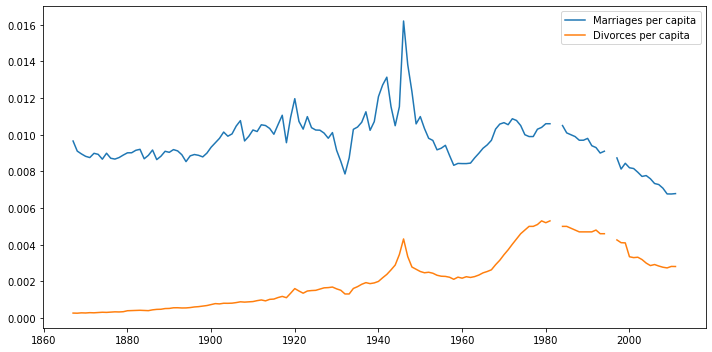

In [140]:
plt.plot(df_marriages['Year'], df_marriages['Marriages']/df_marriages['Population'], label = "Marriages per capita")
plt.plot(df_marriages['Year'], df_marriages['Divorces']/df_marriages['Population'], label = "Divorces per capita")
leg = plt.legend(loc='upper right')
plt.xlabel("Year")
plt.ylabel("Per capita")


In [ ]:
df_marriages.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [ ]:
df_marriages['mar_per_capita'] = df_marriages['Marriages'] / df_marriages['Population']
df_marriages['Div_per_capita'] = df_marriages['Divorces'] / df_marriages['Population']

In [ ]:
df_marr_50 = df_marriages[(df_marriages['Year'] < 1950) & (df_marriages['Year'] > 1900)]
df_marr_20 = df_marriages[(df_marriages['Year'] < 2000) & (df_marriages['Year'] > 1950)]

Text(0, 0.5, 'Per capita')

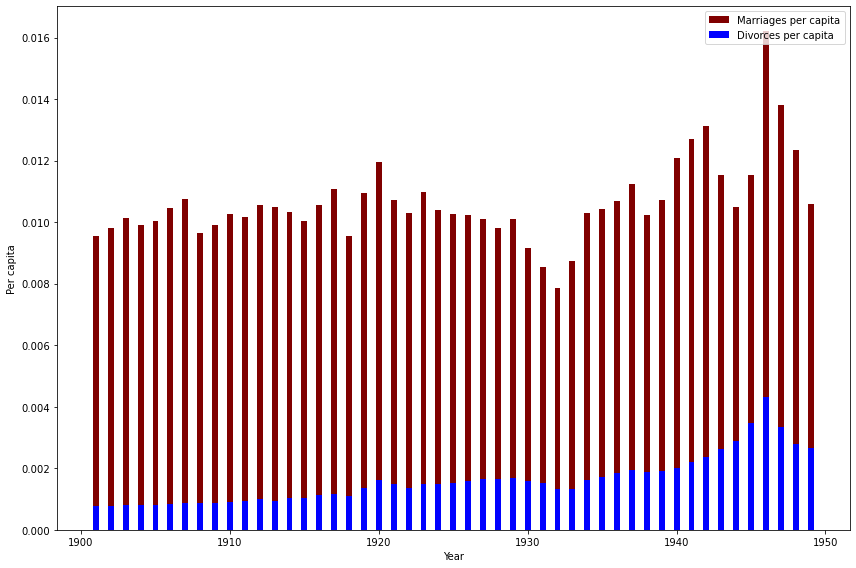

In [ ]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize =(12, 8))
plt.bar(df_marr_50['Year'], df_marr_50['Marriages']/df_marr_50['Population'], color ='maroon',
        width = 0.4,label = "Marriages per capita")
plt.bar(df_marr_50['Year'], df_marr_50['Divorces']/df_marr_50['Population'], color ='blue',
        width = 0.4,label = "Divorces per capita")
leg = plt.legend(loc='upper right')
plt.xlabel("Year")
plt.ylabel("Per capita")

## Problem 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

Text(0.5, 0, 'Year')

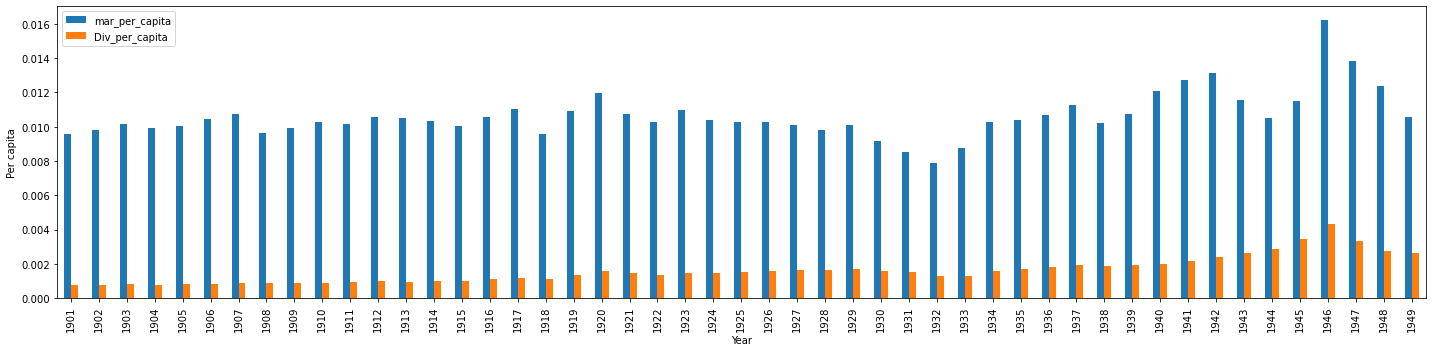

In [ ]:
df_marr_50.plot(x="Year", y=["mar_per_capita", "Div_per_capita"], kind="bar",figsize=(20,5))
plt.ylabel("Per capita")
plt.xlabel("Year")

Text(0, 0.5, 'Per capita')

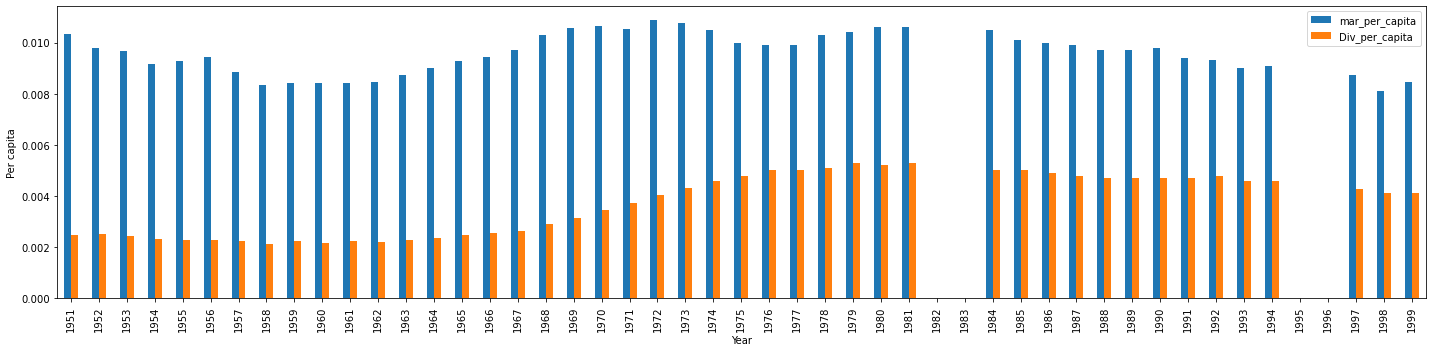

In [ ]:
df_marr_20.plot(x="Year", y=["mar_per_capita", "Div_per_capita"], kind="bar",figsize=(20,5))
plt.xlabel("Year")
plt.ylabel("Per capita")

## Problem 8
 Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
 the actors by their kill count and label each bar with the corresponding actor's name.
 Don't forget to label your axes!

TypeError: 'str' object is not callable

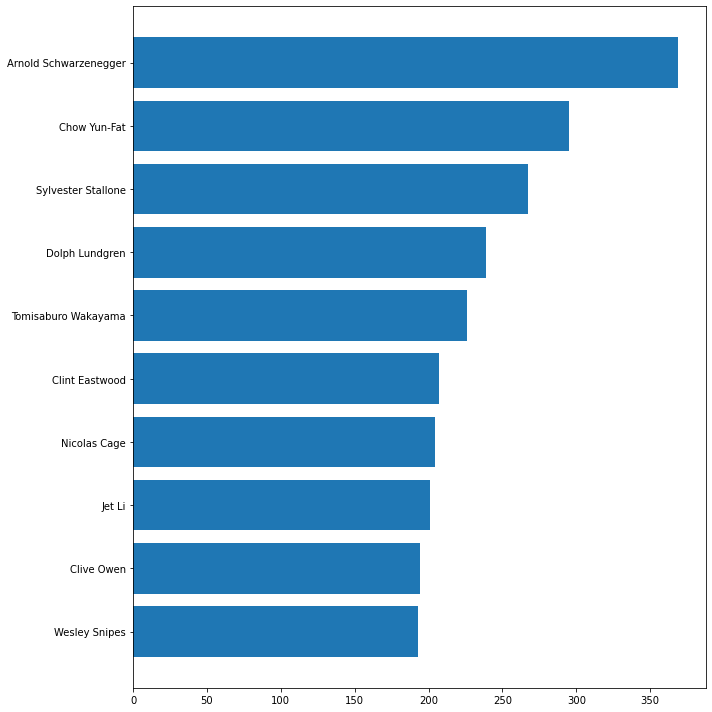

In [ ]:
fig = plt.subplots(figsize =(10,10))
df_actor  = pd.read_csv('/Users/Leela/Downloads/actor_kill_counts.csv')
df_actor_sort = df_actor.sort_values("Count")
plt.barh(df_actor_sort['Actor'],df_actor_sort['Count'])
plt.xlabel("Actor")
plt.ylabel("Kill Count")

## Problem 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.


In [ ]:

df_roman = pd.read_csv('roman-emperor-reigns.csv')
df_roman

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


<AxesSubplot:ylabel='Cause_of_Death'>

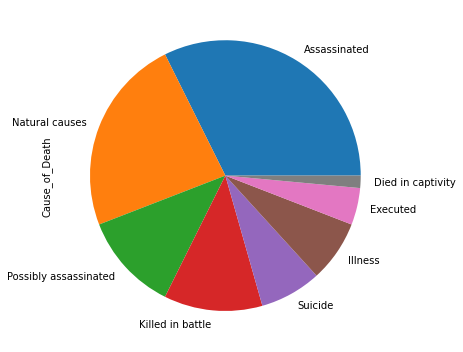

In [ ]:
df_roman['Cause_of_Death'].value_counts().plot(kind='pie')

([<matplotlib.patches.Wedge at 0x7f961db85af0>,
 [Text(0.5790753482603685, 0.9352388684379692, 'Assassinated'),
  Text(-1.025719479700726, 0.39736576219205416, 'Natural causes'),
  Text(-0.8129097548643817, -0.7410652673323255, 'Possibly assassinated'),
  Text(-0.10149511246469993, -1.0953076016105148, 'Killed in battle'),
  Text(0.5352650097816886, -0.9609845832808188, 'Suicide'),
  Text(0.9074972879645549, -0.6216499596533229, 'Illness'),
  Text(1.0707818897912493, -0.25184547741637286, 'Executed'),
  Text(1.0988262785166438, -0.050801669670033, 'Died in captivity')],
 [Text(0.31585928086929194, 0.5101302918752558, '32%'),
  Text(-0.5594833525640323, 0.2167449611956659, '24%'),
  Text(-0.44340532083511724, -0.4042174185449047, '12%'),
  Text(-0.05536097043529086, -0.5974405099693716, '12%'),
  Text(0.2919627326081937, -0.5241734090622647, '7%'),
  Text(0.494998520707939, -0.3390817961745397, '7%'),
  Text(0.5840628489770451, -0.13737026040893063, '4%'),
  Text(0.5993597882818057, -0.

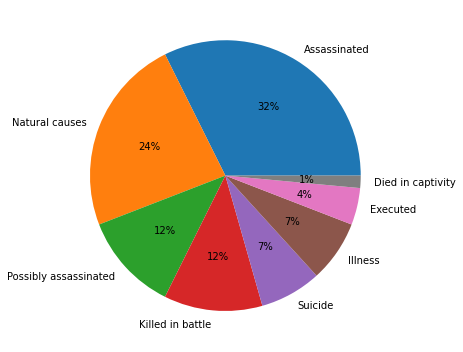

In [ ]:
plt.pie(df_roman['Cause_of_Death'].value_counts(),labels=df_roman['Cause_of_Death'].value_counts().index.to_list(), autopct='%1.0f%%')

## Problem 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! Color each dot according to its year.

In [ ]:
df_arcade = pd.read_csv('/Users/Leela/Downloads/arcade-revenue-vs-cs-doctorates.csv')
df_arcade

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


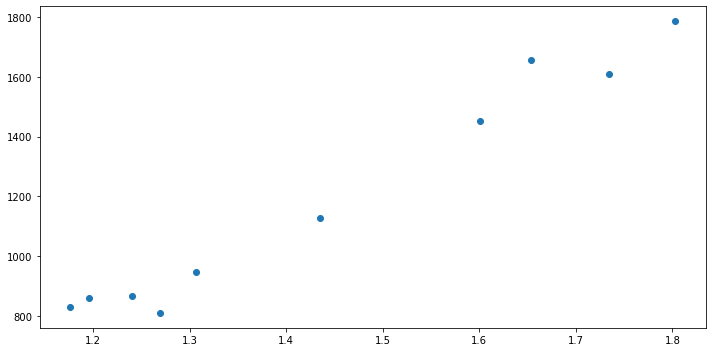

In [ ]:
plt.scatter(df_arcade['Total Arcade Revenue (billions)'],df_arcade['Computer Science Doctorates Awarded (US)'])